# Advanced Data Structures and Algorithms
By Dr. [Uzay Cetin](https://uzay00.github.io/kahve/)

 - Course for CMPE 232 @ Bilgi University
 - Python Implementations of Graph Algorithms

Go to our Book's web site: https://algs4.cs.princeton.edu/lectures/

# Shortest Path
<table>
    <tr>
        <td>
            <img src='Figures/intro1.png', width = '600'>
        </td>
        <td>
            <img src='figures/intro0.png', width = '600'>
        </td>
    </tr>
</table>

## Finding Shortest Path
<img src="Figures/sp.png" alt="HTML5 Icon" width="700" height="500">

# Directed Weighted Graphs

In [1]:
import warnings
warnings.filterwarnings('ignore')

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

class edge():
    def __init__(self, s: str, t: str, weight:float):
        self.s = s
        self.t = t
        self.weight = weight
        
    def __str__(self):
        return "{} > {}".format(self.s,self.t)

class node():
    def __init__(self, name: str):
        """
         - node has a name (str)
         - DIFFERENTLY neighbors is the list of edge objects
        """
        self.name = name
        self.neighbors = [] # list of edge objects !!
        
    def neighbors_name(self) -> list:
        """
        info about neighbors names (returns list of strings)
        """
        return [(e.t, e.weight) for e in self.neighbors]
      
        
class weightedDiGraph():
    def __init__(self, elist: list):
        """
            self.nodes is a dictionary
                key   : node name
                value : node object
        """
        self.elist = elist
        self.node_names = list(set([s for s, t, w in elist] + [t for s,t,w in elist]))
        self.nodes = {s:node(s) for s in self.node_names}
        
        self.create_graph()
      
    def add_edge(self, e:edge):
        """directed Edge"""
        self.nodes[e.s].neighbors.append(e)
    
    def create_graph(self):
        for s,t,w in self.elist:
            e = edge(s,t,w)
            self.add_edge(e)
                
    def info(self) -> dict:
        return {s:node_s.neighbors_name() for s,node_s in self.nodes.items()}
    
    def draw(self, color = 'orange'):
        """
            Usage of networkx for visualisation
        """
        G = nx.DiGraph()
        G.add_weighted_edges_from(self.elist)
        plt.figure(figsize=(20,10))
       
        pos = nx.spring_layout(G)  # positions for all nodes
        nx.draw(G, pos, node_size=2000, node_color=color, font_size=40, with_labels=True)
        nx.draw_networkx_edge_labels(G, pos, font_size=20,  edge_labels = nx.get_edge_attributes(G,'weight'))


             

In [2]:
elist = [('A', 'B', 5), ('A', 'H', 8), ('A', 'E', 9), ('B', 'H', 4), ('B', 'C', 12), ('B', 'D', 15),
        ('C', 'D', 3), ('C', 'G', 11), ('D', 'G', 9), 
        ('E', 'H', 5),('E', 'F', 4),('E', 'G', 20),
         ('F', 'C', 1),('F', 'G', 13),
         ('H', 'C', 7),('H', 'F', 6)]

In [3]:
G = weightedDiGraph(elist)

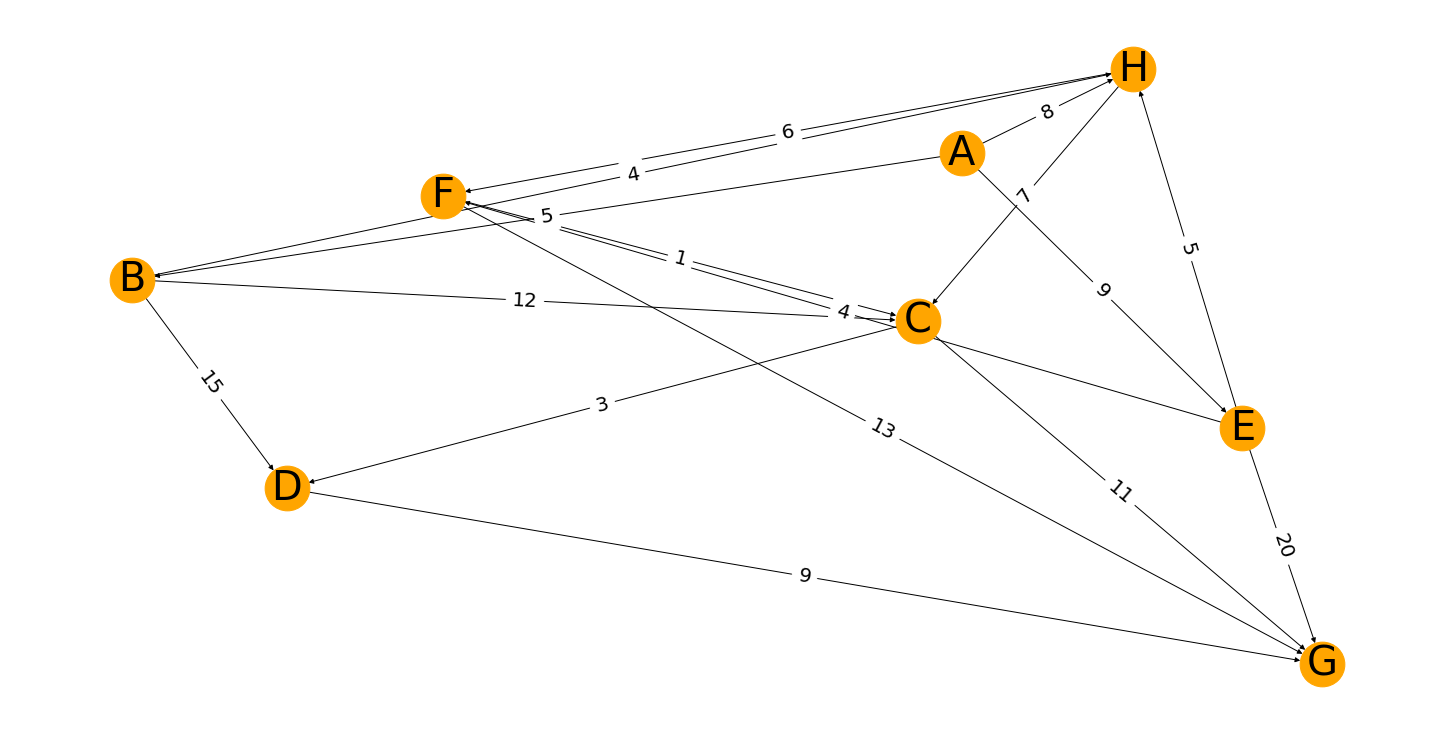

In [4]:
G.draw()

In [5]:
G.info()

{'F': [('C', 1), ('G', 13)],
 'C': [('D', 3), ('G', 11)],
 'H': [('C', 7), ('F', 6)],
 'B': [('H', 4), ('C', 12), ('D', 15)],
 'G': [],
 'A': [('B', 5), ('H', 8), ('E', 9)],
 'D': [('G', 9)],
 'E': [('H', 5), ('F', 4), ('G', 20)]}

## Edge Relaxation 

<img src="Figures/edge_relax0.png" alt="HTML5 Icon" width="700" height="500">

<img src="Figures/edge_relax1.png" alt="HTML5 Icon" width="700" height="500">

## Generic Shortest Path
<img src="Figures/generic_shortest_path.png" alt="HTML5 Icon" width="700" height="500">

# Indexed  Priority Queues

- Required for edge relaxtion

In [6]:
from pqdict import pqdict # for an indexed priority queue (with key value pair) that allows updating values

pq = pqdict()
pq.additem('a', 4)
pq.additem('b', 6)
pq.additem('c', 7)
pq

pqdict({'a': 4, 'b': 6, 'c': 7})

In [7]:
v, distance = pq.popitem()

if 'c' in pq:
    pq.updateitem('c', 5)
    
print("distance =", distance, "   v =", v)
pq

distance = 4    v = a


pqdict({'c': 5, 'b': 6})

# Shortest Path

In [8]:
class SP():
    def __init__(self, G:weightedDiGraph, s: str):
        """
        Dijkstra Algoritm for Shortest Paths starting from source node s in graph G
        """
        self.G = G
        self.edgeTo = {n: None for n in self.G.node_names} # n: name of the node
        
        # initially distance to every vertex is +inf, except source vertex s
        self.distTo = {n: float("inf") for n in self.G.node_names}
        self.distTo[s] = 0

        self.pq = pqdict() # Indexed Priority Queue (Key: node name , Value: smallest distance)
        self.pq.additem(s, self.distTo[s]) # Add vertex s to priority queue with priority distTo[s]
   
        while self.pq: # E (worst case)
            print(self.pq)
            v, distance = self.pq.popitem()# pop next vertex
            print("distance =", distance, "   v =", v, '\n')
            for e in self.G.nodes[v].neighbors:
                self.relax(e)
                
    def relax(self, e:edge):
        s, t, weight = e.s, e.t, e.weight
        if self.distTo[s] + weight < self.distTo[t]:
            self.distTo[t] = self.distTo[s] + weight
            self.edgeTo[t] = e

            if(t in self.pq): self.pq.updateitem(t, self.distTo[t]) # log V (worst case)
            else: self.pq.additem(t, self.distTo[t])          

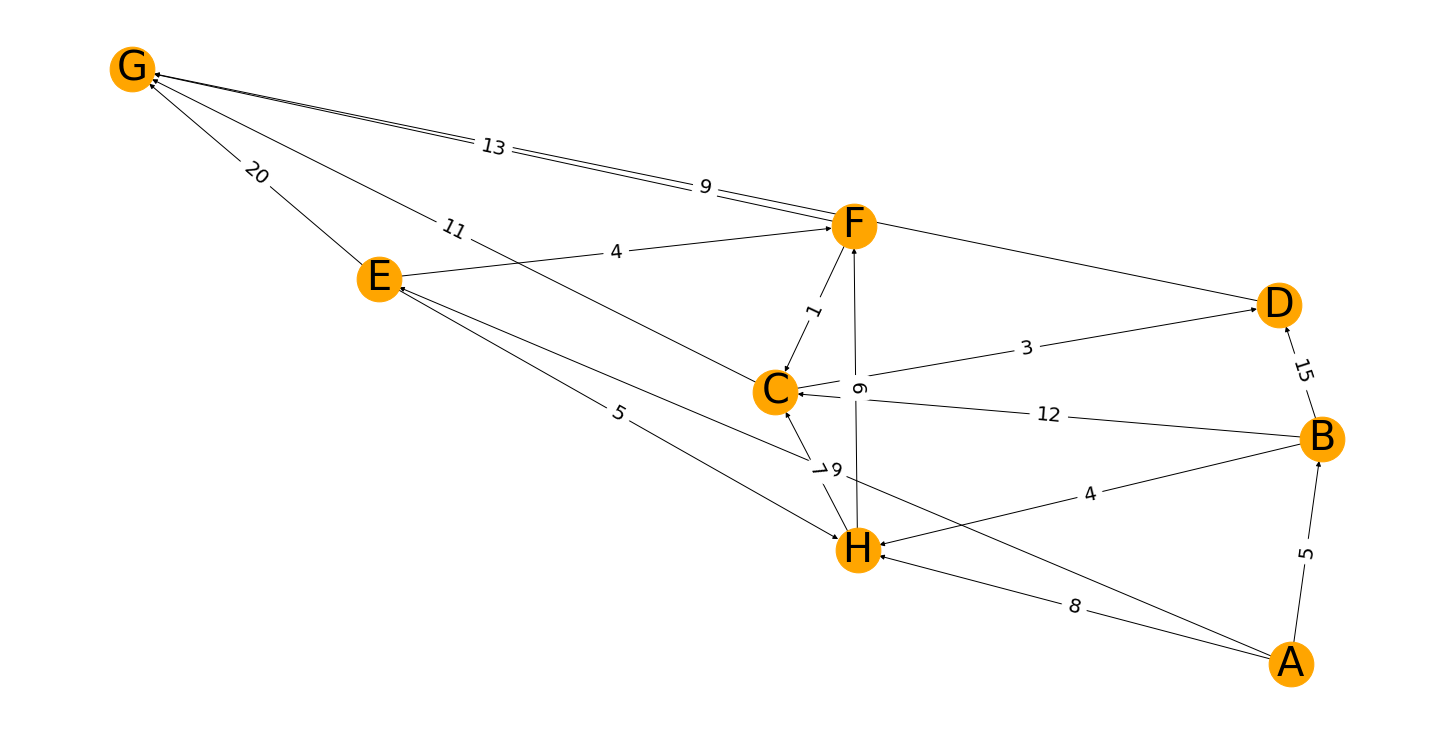

In [9]:
elist = [('A', 'B', 5), ('A', 'H', 8), ('A', 'E', 9), ('B', 'H', 4), ('B', 'C', 12), ('B', 'D', 15),
        ('C', 'D', 3), ('C', 'G', 11), ('D', 'G', 9), 
        ('E', 'H', 5),('E', 'F', 4),('E', 'G', 20),
         ('F', 'C', 1),('F', 'G', 13),
         ('H', 'C', 7),('H', 'F', 6)]

G = weightedDiGraph(elist)
G.draw()

In [10]:
sp = SP(G, s = 'A')
{n:str(sp.edgeTo[n]) for n in sp.edgeTo.keys()}

pqdict({'A': 0})
distance = 0    v = A 

pqdict({'B': 5, 'H': 8, 'E': 9})
distance = 5    v = B 

pqdict({'H': 8, 'E': 9, 'C': 17, 'D': 20})
distance = 8    v = H 

pqdict({'E': 9, 'F': 14, 'C': 15, 'D': 20})
distance = 9    v = E 

pqdict({'F': 13, 'D': 20, 'C': 15, 'G': 29})
distance = 13    v = F 

pqdict({'C': 14, 'D': 20, 'G': 26})
distance = 14    v = C 

pqdict({'D': 17, 'G': 25})
distance = 17    v = D 

pqdict({'G': 25})
distance = 25    v = G 



{'F': 'E > F',
 'C': 'F > C',
 'H': 'A > H',
 'B': 'A > B',
 'G': 'C > G',
 'A': 'None',
 'D': 'C > D',
 'E': 'A > E'}

In [11]:
sp.edgeTo

{'F': <__main__.edge at 0xa2179b080>,
 'C': <__main__.edge at 0xa2179b048>,
 'H': <__main__.edge at 0xa2176b160>,
 'B': <__main__.edge at 0xa2176b390>,
 'G': <__main__.edge at 0xa2176b0b8>,
 'A': None,
 'D': <__main__.edge at 0xa2176bc50>,
 'E': <__main__.edge at 0xa2176bdd8>}

In [12]:
sp.distTo

{'F': 13, 'C': 14, 'H': 8, 'B': 5, 'G': 25, 'A': 0, 'D': 17, 'E': 9}

<table>
    <tr>
        <td>
            <img src='Figures/graph.png', width = '800'>
        </td>
        <td>
            <img src='figures/algo.png', width = '400'>
        </td>
    </tr>
</table>

# Get the shortest path 
to G from A

In [13]:
sp.edgeTo

{'F': <__main__.edge at 0xa2179b080>,
 'C': <__main__.edge at 0xa2179b048>,
 'H': <__main__.edge at 0xa2176b160>,
 'B': <__main__.edge at 0xa2176b390>,
 'G': <__main__.edge at 0xa2176b0b8>,
 'A': None,
 'D': <__main__.edge at 0xa2176bc50>,
 'E': <__main__.edge at 0xa2176bdd8>}

In [14]:
t = 'G'
path = [t]
e = sp.edgeTo[t]
str(e)

'C > G'

In [15]:
t = 'G'
path = [t]
e = sp.edgeTo[t]
while e: 
    new_t = e.s
    path.append(new_t)
    e = sp.edgeTo[e.s]

In [16]:
path

['G', 'C', 'F', 'E', 'A']

In [17]:
path[::-1]

['A', 'E', 'F', 'C', 'G']

## Time Complexity

<img src="Figures/TimeComplexity.png" alt="HTML5 Icon" width="700" height="500">

# Bellman Ford

Negative weights and negative cycles.

 - If no negative cycles, can find shortest paths via Bellman-Ford.


<img src="Figures/negative.png" alt="HTML5 Icon" width="700" height="500">


The Bellman-Ford algorithm takes time proportional to EV and extra space proportional to V.

 - Proof: Each of the V passes relaxes E edges.
 
 <img src="Figures/Bellman.png" alt="HTML5 Icon" width="700" height="500">



In [18]:
class BellmanFord():
    def __init__(self, G:weightedDiGraph, s: str):
        """
        BellmanFord Algoritm for Shortest Paths starting from source node s in graph G
        """
        self.G = G
        self.edgeTo = {n: None for n in G.node_names} # n: name of the node
        self.distTo = {n: float("inf") for n in G.node_names}
        # initially distance to every vertex is +inf, except source vertex s
        self.distTo[s] = 0
        
        for i in range(len(G.node_names)):
            for v in G.node_names:
                for e in self.G.nodes[v].neighbors:
                    self.relax(e)
                    
        self.has_negative_cycle()
                
    def relax(self, e:edge):
        s, t, weight = e.s, e.t, e.weight
        if self.distTo[s] + weight < self.distTo[t]:
            self.distTo[t] = self.distTo[s] + weight
            self.edgeTo[t] = e
          
    #we can find the shortest path in V iterations. If the min_distance descreases in the	
    #V+1 iterartion it means there is a negative cycle
    def has_negative_cycle(self):
        for v in G.node_names:
            for e in self.G.nodes[v].neighbors:
                if self.distTo[e.s] + e.weight < self.distTo[e.t]:
                    print(e.s, e.t, e.weight)
                    print("Negative cycle detected...")
                    return True
        return False

In [19]:
BF = BellmanFord(G, s = 'A')

In [20]:
t = 'C'
path = [t]
e = BF.edgeTo[t]
while e: 
    new_t = e.s
    path.append(new_t)
    e = BF.edgeTo[e.s]

In [21]:
BF.edgeTo

{'F': <__main__.edge at 0xa2179b080>,
 'C': <__main__.edge at 0xa2179b048>,
 'H': <__main__.edge at 0xa2176b160>,
 'B': <__main__.edge at 0xa2176b390>,
 'G': <__main__.edge at 0xa2176b0b8>,
 'A': None,
 'D': <__main__.edge at 0xa2176bc50>,
 'E': <__main__.edge at 0xa2176bdd8>}

In [22]:
path

['C', 'F', 'E', 'A']

In [23]:
path[::-1]

['A', 'E', 'F', 'C']

In [24]:
BF.has_negative_cycle()

False

{'B': [('C', 8)], 'C': [('A', -55)], 'A': [('B', 5)]}

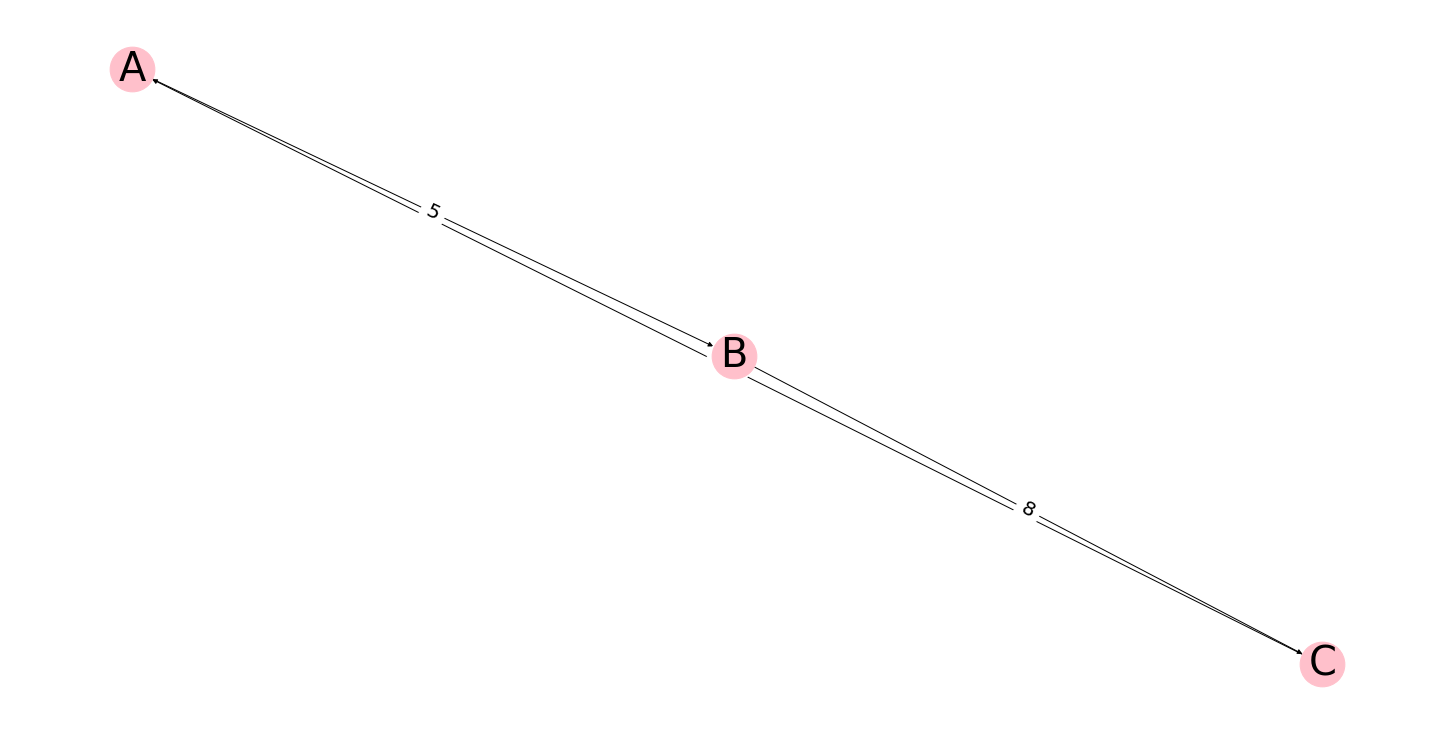

In [25]:
elist = [('A', 'B', 5), ('B', 'C', 8), ('C', 'A', -55)]
G = weightedDiGraph(elist)
G.draw('pink')
G.info()

In [26]:
BF = BellmanFord(G, s = 'A')
BF.has_negative_cycle()

B C 8
Negative cycle detected...
B C 8
Negative cycle detected...


True

In [27]:
class BellmanFord():
    def __init__(self, G:weightedDiGraph, s: str):
        """
        BellmanFord Algoritm for Shortest Paths starting from source node s in graph G
        """
        self.G = G
        self.edgeTo = {n: None for n in G.node_names} # n: name of the node
        self.distTo = {n: float("inf") for n in G.node_names}
        # initially distance to every vertex is +inf, except source vertex s
        self.distTo[s] = 0
        
        for i in range(len(G.node_names)):
            for v in G.node_names:
                for e in self.G.nodes[v].neighbors:
                    self.relax(e)
             
        self.cycle_last_edge = self.has_negative_cycle()
        if self.cycle_last_edge != -1:
            print("**", self.cycle_last_edge)
                
    def relax(self, e:edge):
        s, t, weight = e.s, e.t, e.weight
        if self.distTo[s] + weight < self.distTo[t]:
            self.distTo[t] = self.distTo[s] + weight
            self.edgeTo[t] = e
          
    #we can find the shortest path in V iterations. If the min_distance descreases in the	
    #V+1 iterartion it means there is a negative cycle
    def has_negative_cycle(self):
        for v in G.node_names:
            for e in self.G.nodes[v].neighbors:
                if self.distTo[e.s] + e.weight < self.distTo[e.t]:
                    print(e.s, e.t, e.weight)
                    print("Negative cycle detected...")
                    return e
        return -1

In [28]:
BF = BellmanFord(G, s = 'A')

B C 8
Negative cycle detected...
** B > C


In [29]:
e = BF.cycle_last_edge
e.t

'C'